In [1]:
#import SLModels from ../src/SLmodels.py
import numpy
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from SLmodels import *

In [21]:
m = TwoDimensionalHaldane(L=20, disorder=0, rho=10, kappa=0.3, X=None, t1=1.0, t2=1.0/3.0, M=2.5, phi=np.pi/4)
chern = m.calculate_local_chern_marker()


In [22]:
m.H.todense()

matrix([[ 2.5       +0.j        , -1.        +0.j        ,
         -0.23570226-0.23570226j, ...,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [-1.        +0.j        , -2.5       +0.j        ,
         -1.        +0.j        , ...,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [-0.23570226+0.23570226j, -1.        +0.j        ,
          2.5       +0.j        , ...,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        ...,
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        , ..., -2.5       +0.j        ,
         -1.        +0.j        , -0.23570226+0.23570226j],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        , ..., -1.        +0.j        ,
          2.5       +0.j        , -1.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0. 

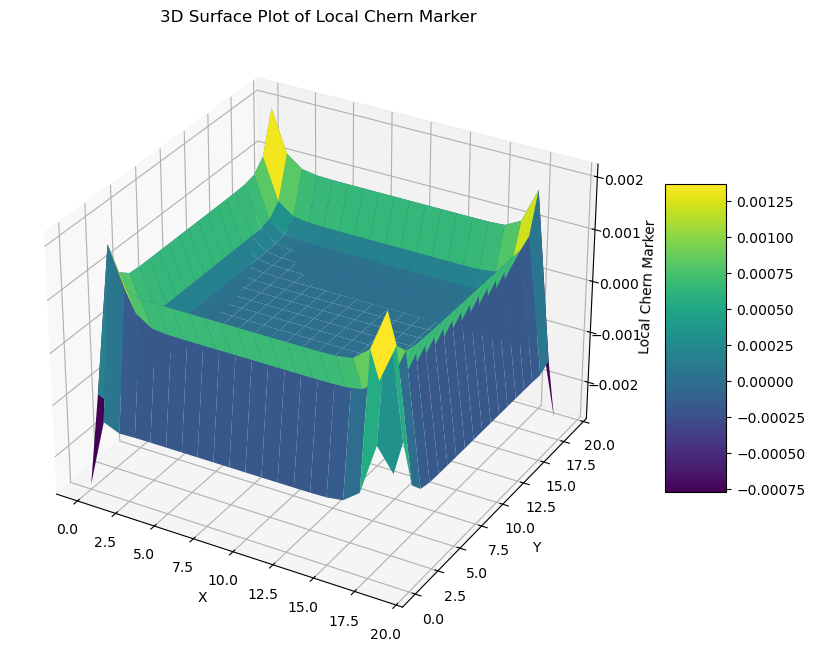

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Create the meshgrid
x = np.arange(chern.shape[1])
y = np.arange(chern.shape[0])
X, Y = np.meshgrid(x, y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, chern, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Local Chern Marker')
plt.title('3D Surface Plot of Local Chern Marker')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Hamiltonian is Hermitian: True


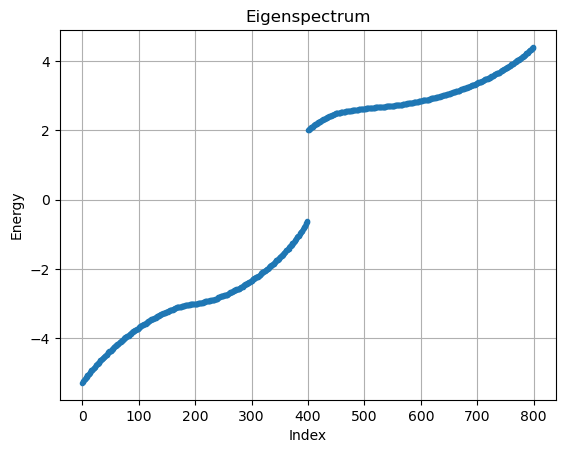

In [24]:
# 1. Check Hermiticity
is_hermitian = np.allclose(m.H.toarray(), m.H.T.conj().toarray())
print(f"Hamiltonian is Hermitian: {is_hermitian}")

# 2. Check the Band Gap
if m.H_eigval is None:
    m.find_eigval(m.H, sparse=False)

import matplotlib.pyplot as plt
plt.plot(m.H_eigval, '.')
plt.title("Eigenspectrum")
plt.ylabel("Energy")
plt.xlabel("Index")
plt.grid(True)
plt.show()

In [25]:
H_dense = m.H.toarray()
print("Hermitian:", np.allclose(H_dense, H_dense.conj().T))

nn_matrix = (np.abs(H_dense) > 0.5*1.0) & (np.abs(H_dense) < 1.5*1.0)
print("NN per site:", nn_matrix.sum(axis=1))

Hermitian: True
NN per site: [2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
np.set_printoptions(threshold=sys.maxsize, linewidth=2000)
print(m.H.todense())

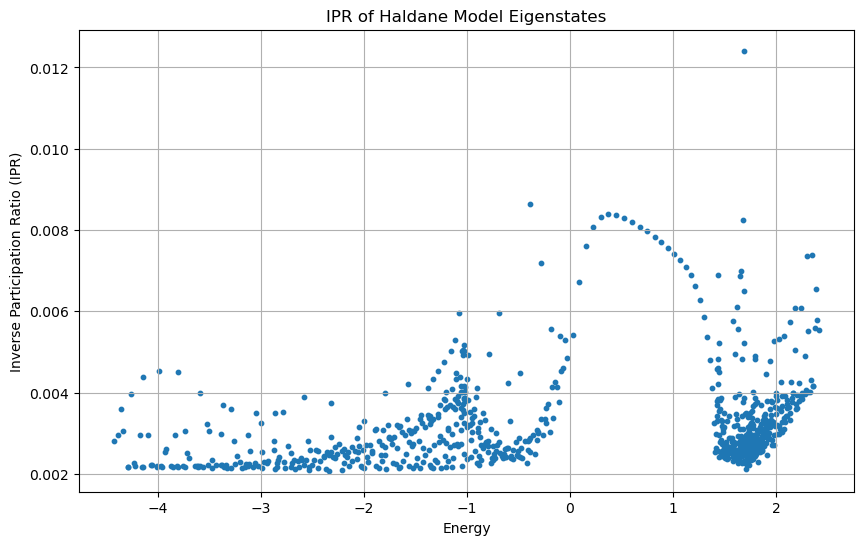

In [ ]:
# Calculate eigenvalues and eigenvectors of the dense Hamiltonian
eigvals, eigvecs = np.linalg.eigh(m.H.toarray())

# Calculate the IPR for each eigenvector
# IPR = sum(|psi_i|^4) for each eigenvector psi
ipr = np.sum(np.abs(eigvecs)**4, axis=0)

# Plot IPR vs Energy
plt.figure(figsize=(10, 6))
plt.scatter(eigvals, ipr, s=10)
plt.xlabel("Energy")
plt.ylabel("Inverse Participation Ratio (IPR)")
plt.title("IPR of Haldane Model Eigenstates")
plt.grid(True)
plt.show()

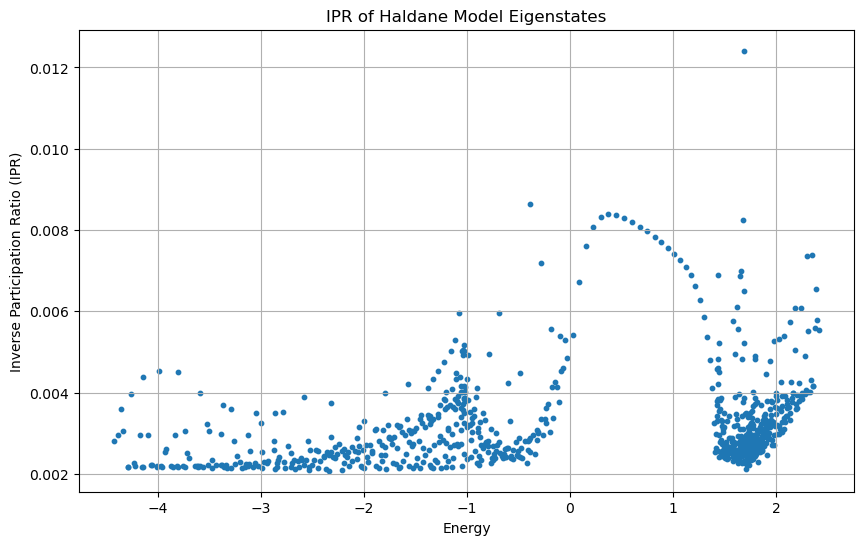

In [19]:
# Calculate eigenvalues and eigenvectors of the dense Hamiltonian
eigvals, eigvecs = np.linalg.eigh(m.H.toarray())

# Calculate the IPR for each eigenvector
# IPR = sum(|psi_i|^4) for each eigenvector psi
ipr = np.sum(np.abs(eigvecs)**4, axis=0)

# Plot IPR vs Energy
plt.figure(figsize=(10, 6))
plt.scatter(eigvals, ipr, s=10)
plt.xlabel("Energy")
plt.ylabel("Inverse Participation Ratio (IPR)")
plt.title("IPR of Haldane Model Eigenstates")
plt.grid(True)
plt.show()

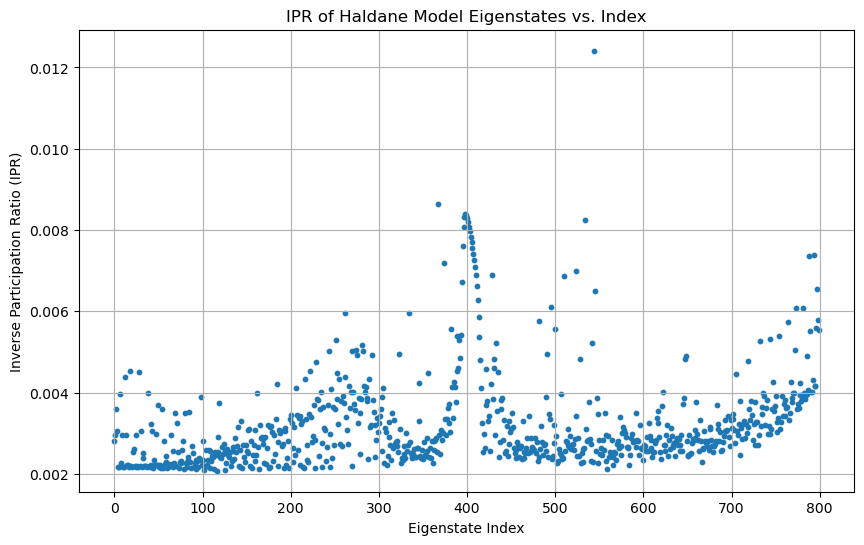

In [20]:
# The 'ipr' variable is calculated in the cell above.
# Create an index array for the x-axis.
index = np.arange(len(ipr))

# Plot IPR vs. index
plt.figure(figsize=(10, 6))
plt.scatter(index, ipr, s=10)
plt.xlabel("Eigenstate Index")
plt.ylabel("Inverse Participation Ratio (IPR)")
plt.title("IPR of Haldane Model Eigenstates vs. Index")
plt.grid(True)
plt.show()